# 신경망

## 3.2 활성화 함수

## 3.2.2 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else :
        return 0

인수 x는 실수(부동소수점)만 받아들인다.  
즉, step_function(3.0)은 되지만 numpy 배열을 인수로 넣을 수 없다.

In [2]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [3]:
y = x > 0
y

array([False,  True,  True], dtype=bool)

numpy 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다.  
배열 x의 원소 각각이 0보다 크면 True로, 0 이하면 False로 변환한 새로운 배열 y가 생성된다.

In [4]:
y = y.astype(np.int)
y

array([0, 1, 1])

numpy 배열의 자료형을 변환할 때는 astype() 메서드를 이용한다.

### 3.2.3 계단 함수의 그래프

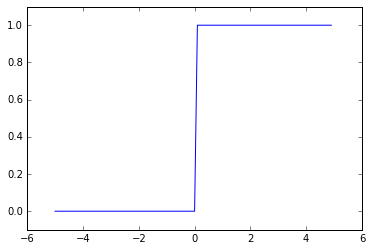

In [5]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

In [7]:
# numpy 브로드캐스트
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([ 2.,  3.,  4.])

In [8]:
1.0 / t

array([ 1.        ,  0.5       ,  0.33333333])

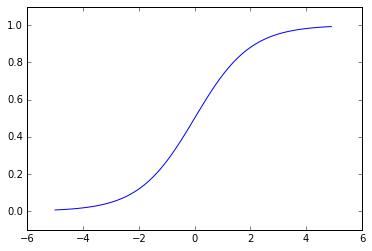

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

* 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다.  
한편, 계단 함수는 0을 경계로 출력이 갑자기 변하고 있다.  
시그모이드 함수의 부드로운 곡선이 신경망 학습에서 중요한 역할을 하게 된다.

  
* 계단함수가 0과 1중 하나의 값을 돌려주는 반면 시그모이는 함수는 실수를 돌려준다는 점에서 다르다.   
퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.


* 둘 다 입력이 작을 때의 출력은 0에 가깝고(혹은 0이고), 입력이 커지면 출력이 1에 가까워지는(혹은 1이 되는) 구조이다.  
즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.  
입력이 아무리 작거나 커도 출력은 0에서 1사이라는 것도 둘의 공통점이다.

### 3.2.6 비선형 함수

'선형이 아닌' 함수  
직선 1개로는 그릴 수 없는 함수

선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어진다.  
즉, 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.  

선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 데 있다.  
선형 함수인 h(x) = cx를 활성화 함수로 사용한 3층 네트워크를 식으로 나타내면 y(x) = h(h(h(x)))가 된다.  
이 계산은 y(x) = c \* c \* c \* x처럼 세 번의 곱셈을 수행하지만, a = c^3 라고 표현하면 y(x) = ax와 똑같은 식이 된다.  
즉, 은닉층이 없는 네트워크로 표현할 수 있다.  
따라서 층을 쌓은 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

### 3.2.7 ReLU 함수

ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

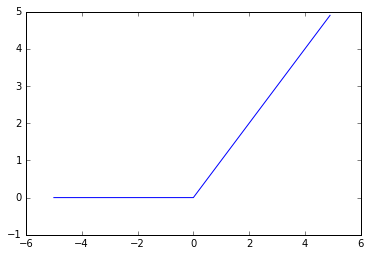

In [10]:
def relu(x):
    # maximum 두 입력 중 큰 값을 선택해 반환하는 함수
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1)
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [11]:
import numpy as np

a = np.array([1, 2, 3, 4])
print(a)

np.ndim(a) # 배열의 차원 수

[1 2 3 4]


1

In [12]:
a.shape # 배열의 형상

(4,)

In [13]:
a.shape[0]

4

In [14]:
b = np.array([[1,2], [3, 4], [5, 6]])
print(b)

np.ndim(b)

[[1 2]
 [3 4]
 [5 6]]


2

In [15]:
b.shape

(3, 2)

### 3.3.2 행렬의 내적(행렬 곱)

In [16]:
a = np.array([[1, 2], [3, 4]])
print(a.shape)

b = np.array([[5, 6], [7, 8]])
print(b.shape)

np.dot(a, b)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [17]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a.shape)

b = np.array([[1, 2], [3, 4], [5, 6]])
print(b.shape)

np.dot(a, b)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [18]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a.shape)

b = np.array([7, 8])
print(b.shape)

np.dot(a, b)

(3, 2)
(2,)


array([23, 53, 83])

### 3.3.3 신경망의 내적

In [19]:
x = np.array([1, 2])
print(x.shape)

w = np.array([[1, 3, 5], [2, 4, 6]])
print(w)
print(w.shape)

y = np.dot(x, w)
print(y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3층 신경망 구현하기

In [20]:
# 입력층에서 1층으로의 신호 전달
x = np.array([1.0, 0.5])
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

print(x.shape)
print(w1.shape)
print(b1.shape)

a1 = np.dot(x, w1) + b1

(2,)
(2, 3)
(3,)


In [21]:
z1 = sigmoid(a1)

print(a1)
print(z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [22]:
# 1층에서 2층으로의 신호 전달
w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

print(z1.shape)
print(w2.shape)
print(b2.shape)

a2 = np.dot(z1, w2) + b2
z2 = sigmoid(a2)

print(a2)
print(z2)

(3,)
(3, 2)
(2,)
[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]


In [23]:
# 2층에서 출력층으로의 신호 전달
def identity_function(x):
    return x

w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

a3 = np.dot(z2, w3) + b3
y = identity_function(a3)

print(y)

[ 0.31682708  0.69627909]


출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.  
예를 들어, 회귀에는 **항등 함수**를, 2클래스 분류에는 **시그모이드 함수**를,  
다중 클래스 분류에는 **소프트맥스 함수**를 사용하는 것이 일반적이다.

### 구현 정리

In [24]:
def init_network():
    network = {}
    network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = identity_function(a3)
    
    return y
    
def identity_function(x):
    return x

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


## 3.5 출력층 설계하기

### 소프트맥스 함수

In [25]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [26]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
    
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)

[ 0.01821127  0.24519181  0.73659691]


In [27]:
a = np.array([1010, 1000, 900])
np.exp(a) / np.sum(np.exp(a)) #소프르맥스 함수의 계산
                              #제대로 계산되지 않는다.

C:\Users\Jun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\Jun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [28]:
c = np.max(a)
a - c

array([   0,  -10, -110])

In [29]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([  9.99954602e-01,   4.53978687e-05,   1.68883521e-48])

In [30]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
    
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)

[ 0.01821127  0.24519181  0.73659691]


In [31]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)

np.sum(y) #소프트맥스 함수 출력의 총합은 1
          #확률로 해석할 수 있다.

[ 0.01821127  0.24519181  0.73659691]


1.0

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

In [32]:
import sys, os
sys.path.append(os.pardir) #부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)


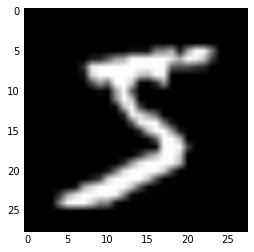

In [33]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

%matplotlib inline

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img, cmap='gray')

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

### 3.6.2 신경망의 추론 처리

In [34]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
#from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 3.6.3 배치 처리

In [35]:
x, _ = get_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [36]:
x, t = get_data()
network = init_network()

batch_size = 100 #배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
